# Example of use

In [1]:
import Skydipper

In [2]:
Skydipper.__version__

'0.1.4'

## Dataset objects

Using known id's you can instantiate a dataset object directly.

In [3]:
ds = Skydipper.Dataset(id_hash='94241cb4-9e91-4a1a-9fcc-993b8ac9c2b7')
ds

Dataset 94241cb4-9e91-4a1a-9fcc-993b8ac9c2b7 bio.014 Biodiversity Intactness

You can access the attributes of a dataset.

In [4]:
ds.attributes

{'name': 'bio.014 Biodiversity Intactness',
 'slug': 'bio014-Biodiversity-Intactness',
 'type': 'raster',
 'subtitle': None,
 'application': ['skydipper'],
 'dataPath': None,
 'attributesPath': None,
 'connectorType': 'rest',
 'provider': 'gee',
 'userId': '5dc9210cbe566d0010df6752',
 'connectorUrl': None,
 'sources': [],
 'tableName': 'users/resourcewatch/bio_014_bio_intactness',
 'status': 'pending',
 'published': False,
 'overwrite': False,
 'verified': False,
 'blockchain': {},
 'mainDateField': None,
 'env': 'production',
 'geoInfo': False,
 'protected': False,
 'legend': {'date': [],
  'region': [],
  'country': [],
  'nested': [],
  'integer': [],
  'short': [],
  'byte': [],
  'double': [],
  'float': [],
  'half_float': [],
  'scaled_float': [],
  'boolean': [],
  'binary': [],
  'text': [],
  'keyword': []},
 'clonedHost': {},
 'errorMessage': None,
 'taskId': None,
 'createdAt': '2019-11-15T10:25:30.592Z',
 'updatedAt': '2019-11-15T10:25:30.650Z',
 'dataLastUpdated': None,
 

You can also access the metadata of a dataset.

In [ ]:
#ds.metadata[0].attributes

## Queries on Datasets

Datasets can be queried via SQL, with a table returned. Currently this is only supported for Carto-type data:

In [ ]:
d = Skydipper.Dataset(id_hash='bd5d7924-611e-4302-9185-8054acb0b44b')
d

In [ ]:
d.query('SELECT fid, ST_ASGEOJSON(the_geom_webmercator) FROM data LIMIT 5')

## Layer Objects

Similarly, you can also instantiate a Layer object.

In [5]:
ly = Skydipper.Layer(id_hash='e7070d5f-3d38-46b1-86eb-e98782da55dd')
ly

Layer e7070d5f-3d38-46b1-86eb-e98782da55dd 2005 Biodiversity Intactness (%)

Layers can be visulized if appropriate via a call to Layer().map()

In [6]:
ly.map()

## Tables

Tables are subclasses of Dataset objects. They are document datasets which can be instantiated and queried returning a dataframe object.

In [ ]:
t = Skydipper.Table(id_hash='86c7135a-855d-4f1b-9d67-f545a93281b3')
t

In [ ]:
df = t.head(3)
df

Queries to tables are returned in geopandas dataframe format.

In [ ]:
type(df)

In [ ]:
t.query("SELECT * from data where City = 'San Francisco'")

## Collection objects: Searching

If you don't know what data you are interested in advance, you can search by keywords and return a list of objects.

In [9]:
c = Skydipper.Collection('a', object_type=['layer','dataset'], app=['skydipper'], limit=10)

In [10]:
c

[0. Dataset 640adc03-5fc4-46ff-bfcf-e622d430fed4 FAO hydrobasins,
 1. Dataset b3e28243-caec-4763-a0bc-1f0d42a8682c Seasonal variability,
 2. Dataset fea74b25-5241-45db-8950-022a02ae3231 Seasonal variability,
 3. Dataset bf6ee0a0-cb95-43d0-851e-c9d189781ade Seasonal variability,
 4. Dataset 70d0cc83-a119-40dd-81f3-177c7a32bfee Seasonal variability,
 5. Dataset 94241cb4-9e91-4a1a-9fcc-993b8ac9c2b7 bio.014 Biodiversity Intactness,
 6. Dataset 58cb00b6-21df-45d6-ae77-ae13479b973e test dataset,
 7. Dataset d60d377b-dd91-4052-b007-422b1f927752 test dataset 002,
 8. Dataset 77e55630-9a35-40d8-bbcb-80803c87ce72 test dataset 003,
 9. Dataset a1d7cb9b-bab7-4a35-8254-fdfb4e236fc0 test dataset 004]

Searching can be restricted with keyword arguments to specifically search types of items, applications, and more. If you want to render those items, you will need to do the following.

You can access items from a collection using subscripts, slices and more. Note that slicing, or selecting by element instantiates the Layer, Table, or Dataset object.

In [11]:
c[0:3]

[Dataset 640adc03-5fc4-46ff-bfcf-e622d430fed4 FAO hydrobasins,
 Dataset b3e28243-caec-4763-a0bc-1f0d42a8682c Seasonal variability,
 Dataset fea74b25-5241-45db-8950-022a02ae3231 Seasonal variability]

In [12]:
c[-1]

Dataset a1d7cb9b-bab7-4a35-8254-fdfb4e236fc0 test dataset 004

## Create a Geometry object

Often you will need to perform some kind of intersect analysis between data held in datasets and tables and a geometry.
We will now show you multiple ways to create your geometry objects.

### From an ID

Vizzuality's API holds geometry objects as a Geostore item. Geostore items are accessed by an id-hash. If you know the hash of your object already you can simply call a geometry like so:

In [20]:
g = Skydipper.Geometry(id_hash='de43241398f124ec2e3d6a3720439a99')
g

Geometry de43241398f124ec2e3d6a3720439a99

### Geometry attributes

The attributes can be accessed as a dictionary.

In [21]:
g.attributes

{'geojson': {'features': [{'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[28.000041976337, 49.7101919873524],
       [28.000041976337, 48.1873700139574],
       [27.7501030114934, 48.1873700139574],
       [27.5001640466497, 48.1873700139574],
       [27.250225081806, 48.1873700139574],
       [26.9998283532904, 48.1873700139574],
       [26.9998283532904, 49.7101919873524],
       [27.250225081806, 49.7101919873524],
       [27.5001640466497, 49.7101919873524],
       [27.7501030114934, 49.7101919873524],
       [28.000041976337, 49.7101919873524]]]}}],
  'crs': {},
  'type': 'FeatureCollection'},
 'hash': 'de43241398f124ec2e3d6a3720439a99',
 'provider': {},
 'areaHa': 1239540.338786885,
 'bbox': [26.9998283532904,
  48.1873700139574,
  28.000041976337,
  49.7101919873524],
 'lock': False,
 'info': {'use': {}}}

### Geometry as a Table

Table method returns a dataframe of the geometry object. Map will add a Folium map with the geomerty rendered.

In [22]:
g.table()

,areaHa,bbox,geometry,id,use
0,1.239540e+06,"[26.9998283532904, 48.1873700139574, 28.000041...","POLYGON ((28.00004 49.71019, 28.00004 48.18737...",de43241398f124ec2e3d6a3720439a99,{}


### Mapping the Geometry

Calling .map() will create a Folium map with the geomerty rendered.

In [23]:
g.map()

### From Geojson - Points

You can create an object as you need on the fly from geojson. The act of creating an object will also register it to a Geostore service of your choice (locally, or on a remote server). You can create a geometry object from geojson Points and MultiPoints type data as follows:

In [25]:
atts = {'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'MultiPoint', 'coordinates': [[-4.29, 39.1097]]}}]}}

point = Skydipper.Geometry(attributes=atts)
point

Geometry 09405592c74fc4f2443d8245ddc0a45e

### From Geojson - Polygons

You can create an object as you need on the fly from geojson. The act of creating an object will also register it to a Geostore service of your choice (locally, or on a remote server).
You can create a geometry object from Geojson Polygon and Multipolygon type data as follows:

In [26]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[82.265625, 32.84267363195431],
       [77.34374999999999, 27.059125784374068],
       [85.4296875, 22.268764039073968],
       [90.3515625, 28.304380682962783],
       [87.5390625, 32.54681317351514],
       [82.265625, 32.84267363195431]]]}}]}}


g1 = Skydipper.Geometry(attributes=atts)
g1

Geometry 75857ff50bc4cbaa687bfdf5070ffdfa

In [27]:
g1.map()

### From a Shapely object

Shapely objects are at the root of popular python geolibraries such as Geopandas. We can recieve those geometry objects and create a Geometry object (simultaneously registering it in a Vizzuality Geostore server).

In [28]:
import geopandas as gpd

In [29]:
%%writefile ./sample.geojson
{"features":[{"properties":null,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[-43.1343734264374,-8.07358087603511],[-43.1327533721924,-8.08277985402466],[-43.1298887729645,-8.08181322762719],[-43.1103515625,-8.07815914647929],[-43.1094932556152,-8.07799981079283],[-43.1094932556152,-8.09641859926744],[-43.1103515625,-8.09645046495416],[-43.1187307834625,-8.0967372560211],[-43.1186878681183,-8.10273857778317],[-43.1186771392822,-8.10358831522616],[-43.1476235389709,-8.10358831522616],[-43.1477630138397,-8.10273857778317],[-43.1505310535431,-8.08645513764317],[-43.1517112255096,-8.08057041885644],[-43.1439757347107,-8.0795931648273],[-43.1448876857758,-8.07574785969913],[-43.1343734264374,-8.07358087603511]]]}}],"crs":{},"type":"FeatureCollection"}

Writing ./sample.geojson


In [30]:
df = gpd.read_file('./sample.geojson')
df

,geometry
0,"POLYGON ((-43.13437 -8.07358, -43.13275 -8.082..."


Hello! 👋 I am a <class 'shapely.geometry.polygon.Polygon'>


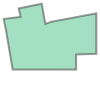

In [31]:
s = df.geometry[0]
print(f"Hello! 👋 I am a {type(s)}")
s

In [32]:
g = Skydipper.Geometry(s=s)

In [33]:
g

Geometry db8b053f9587061f98115c62f8c52325

## Describe a Geometry 

Return a title and textual description of a geometry in any language.

In [34]:
g.map()

In [35]:
%%time
g.describe()

Title: Area in Microrregião de São Raimundo Nonato, Piauí, Brazil
CPU times: user 25.7 ms, sys: 2.88 ms, total: 28.6 ms
Wall time: 2.65 s


In [36]:
g.describe(lang='es') # same description but this time in Spanish

Title: Área en la Microrregião de São Raimundo Nonato, Piauí, Brasil


Second example of geodescriber, but considering a larger area.

In [37]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[82.265625, 32.84267363195431],
       [77.34374999999999, 27.059125784374068],
       [85.4296875, 22.268764039073968],
       [90.3515625, 28.304380682962783],
       [87.5390625, 32.54681317351514],
       [82.265625, 32.84267363195431]]]}}]}}


g2 = Skydipper.Geometry(attributes=atts)
g2

Geometry 75857ff50bc4cbaa687bfdf5070ffdfa

In [38]:
g2.map()

In [39]:
g2.describe()

Title: Area near Nepal, Asia


After running describe, the results are avaiable as geometry.description

In [40]:
g2.description

{'title': 'Area near Nepal, Asia',
 'description': 'The region is made up of different habitats, including Central Tibetan Plateau alpine steppe, and Upper Gangetic Plains moist deciduous forests. This region contains some Intact Forest. The most common environmental conditions of the area are polar tundra climate. The region is made up of several types of biomes, including Montane Grasslands and Shrublands, and Tropical and Subtropical Moist Broadleaf Forests. The location is predominantly land area. Area of 891,255km² located in a mix of lowland and mountainous areas.',
 'lang': 'en'}

## Add a satellite image to the map of your Geometry

### Single images

The Geometry().map() method supports the return of recent satellite imagery. We calculate the centroid of your geometry and return the best, most recent image that intersects with that point. This is simply to provide context to your geometry. For point geometries we return the best cloud-free image we can find within a specified date range.

In [41]:
# Create a point

atts = {'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'MultiPoint', 'coordinates': [[-4.29, 39.1097]]}}]}}

point = Skydipper.Geometry(attributes=atts)
point

Geometry 09405592c74fc4f2443d8245ddc0a45e

In [42]:
point.map(image=True, start='2018-01-01', end='2018-12-31')

### Composite images

Whereas for polygon-type geoms we return a cloud-free composite image clipped to your geometry.

In [43]:
# Create a polygon

atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-0.87890625, 43.329173667843904],
       [-1.6149902343749998, 42.75104599038353],
       [-1.1865234375, 42.35854391749705],
       [-0.6427001953125, 42.755079545072135],
       [-0.45043945312499994, 42.9524020856897],
       [-0.87890625, 43.329173667843904]]]}}]}}

g1 = Skydipper.Geometry(attributes=atts, server='https://production-api.globalforestwatch.org')
g1

Geometry 99e57dfb0832d621c485a7ca9e3a0160

In [44]:
g1.map(image=True, instrument='sentinel')

## Display a Layer and Geometry together

In [46]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-48.131103515625, -0.6001172008725418],
       [-48.13934326171875, -0.9791088369866402],
       [-47.86331176757812, -0.9818550168696459],
       [-47.616119384765625, -0.8459165322899671],
       [-47.50213623046875, -0.7182123915862891],
       [-47.51861572265625, -0.5287095375108173],
       [-47.882537841796875, -0.5163504323777461],
       [-48.131103515625, -0.6001172008725418]]]}}]}}
g = Skydipper.Geometry(attributes=atts)
l = Skydipper.Layer(id_hash='e7070d5f-3d38-46b1-86eb-e98782da55dd')
l

Layer e7070d5f-3d38-46b1-86eb-e98782da55dd 2005 Biodiversity Intactness (%)

In [47]:
l.map(geometry=g)

## Intersecting Raster data with Geometry objects

Any Layer or Dataset objects based on an Earth Engine raster can be intersected with Skydipper.Geometry objects.



In [50]:
g

Geometry 5f9f710d19b925ea589fa0815f5d7f9a

In [51]:
ds

Dataset 94241cb4-9e91-4a1a-9fcc-993b8ac9c2b7 bio.014 Biodiversity Intactness

Finally, you can call the intersect function on the dataset object to see a dictionary of values.

In [52]:
ds.intersect(geometry=g)

{'b1': {'count': 7508,
  'max': 1.0407090187072754,
  'mean': 0.7177545279079055,
  'min': 0.4254504144191742,
  'stdev': 0.1260687511989124,
  'sum': 5288.803793487595}}

### Layer Intersections

Intersections against layers work in the same manner. Here we show an intersect between an area along Brazil's coast and a Mangrove biomass density Layer.

## ImageCollection: Search for satellite images

You can search for Landsat-8 and Sentinel-2 imagery using the ImageCollection module as follows:

In [53]:
ic = Skydipper.ImageCollection(lon=28.3, 
                               lat=-16.6, 
                               start='2018-08-01', 
                               end='2018-08-10') # n.b. lon/lat are temporarily flipped

In [54]:
ic

[0. Image Sentinel-2A 2018-08-08 07:56:11Z,
 1. Image LANDSAT_8 2018-08-05 08:11:14Z,
 2. Image Sentinel-2B 2018-08-03 07:56:09Z]

In [55]:
type(ic)

Skydipper.imageCollection.ImageCollection

All types of pythonic list mainipulation are supported on the image collection results. Including iteration:

In [56]:
for i in ic[0:2]:
    print(i)

Image COPERNICUS/S2/20180808T075611_20180808T081515_T35KPB
Image LANDSAT/LC08/C01/T1_RT_TOA/LC08_172071_20180805


...and subsetting to access individual Images.

## Images: Individual satellite tiles

In [57]:
i = ic[0]
i

Image COPERNICUS/S2/20180808T075611_20180808T081515_T35KPB

In [58]:
type(i)

Skydipper.image.Image

You can access the Image attributes, which indicate the provinence of the tile. 

In [59]:
i.attributes

{'provider': 'COPERNICUS/S2/20180808T075611_20180808T081515_T35KPB'}

### Mapping Satellite Images

You can also display web-map tiles and the bounding-box of the satellite image.

In [60]:
i.map()

### Classification of individual Satellite Images

In [62]:
#classified = i.classify()
#classified

In [ ]:
classified.map()

### Composite and classify satellite image collections

First grab a collection, specifying a point and time period.

In [ ]:
ic = Skydipper.ImageCollection(lon=28.271979, lat=-16.457814, start='2018-06-01', end='2018-06-20')
ic

Next ask for a composite image based on your collection. By default it will be for Sentinel-2, but you may change this via an argument to Landsat.

In [ ]:
i = ic.composite()
i

You can then map your composite image.

In [ ]:
i.map()

You can take your composite image, and apply a land cover classifier based on our pre-trained models. These are Deepvel, and Segnet.

In [ ]:
c = i.classify(model_type='segnet', version='v2')
c

In [ ]:
c.map()

## Construct Widgets

A demo of how to use Skydipper to construct widgets like those on our projects such as [Global Forest Watch Dashboard pages](https://www.globalforestwatch.org/dashboards/country/BRA).

### Tree cover example

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Get a datatable (Hansen)
table = Skydipper.Table('a20e9c0e-8d7d-422f-90f5-3b9bca355aaf')
table

In [ ]:
iso = 'BRA'
administration = 1

sql = f"""
        SELECT 
            SUM(area_extent) as value,
            SUM(area_admin) as total_area 
        FROM data 
        WHERE iso = '{iso}'
        AND adm1 = {administration}
        AND thresh = 30 
        AND polyname = 'admin'
"""

results = table.query(sql=sql)
results

In [ ]:
sizes = [results.value[0], results.total_area[0] - results.value[0]]
colors = ['green','grey']
labels = ['Tree cover', 'Non-forest']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0.5)
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
plt.suptitle('Tree cover extent')
plt.title(f'in {iso}/{administration}')
plt.show()

### Tree cover loss example

In [ ]:
sql = """
SELECT 
    polyname, year_data.year as year, 
    SUM(year_data.area_loss) as area

FROM data 
WHERE polyname = 'admin'
AND thresh= 30
GROUP BY polyname, iso, nested(year_data.year)
"""
global_loss = table.query(sql=sql)
global_loss.head()

In [ ]:
iso='BRA'
loss_data = list(global_loss[global_loss['iso'] == f'{iso}']['area'])
years = list(global_loss[global_loss['iso'] == f'{iso}']['year'])

width = 0.66
fig, ax = plt.subplots()
rects1 = ax.bar(years, loss_data, width, color='#FE5A8D')

# add some text for labels, title and axes ticks
ax.set_ylabel('Loss extent (ha)')
ax.set_title(f'Loss by year in {iso}')
plt.show()

## Creating a local backup of Data objects

Save a local backup of a collection to a specified path. This creates a folder containing a JSON for each dataset and it's associated Layers, Metadata and Vocabularies.

In [ ]:
col = Skydipper.Collection(app=['gfw'], env='production')

In [ ]:
path = './LMI-BACKUP'

In [ ]:
col.save(path)

## Load Data objects from local backup

You can also load a previous version from local backup.

In [ ]:
import os

In [ ]:
files = os.listdir(path)[0:3]
files

In [ ]:
ds_id = files[0].split('.json')[0]
ds_id

In [ ]:
dataset = Skydipper.Dataset(ds_id)

In [ ]:
dataset

In [ ]:
backup = dataset.load(path)

In [ ]:
backup